# Task 1: Prediction Using Supervised ML

# Author : Vinay Salve

*Objective : To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.*
This is a simple linear regression task as it involves just 2 variables.


# 1. Reading and Understanding the Data

*1.1 Importing Required Libraries*

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# import library to supress warnings
import warnings
warnings.filterwarnings('ignore')

*1.2 Reading the Dataset*

In [2]:
# Loading DataSet
s_data = pd.read_csv("http://bit.ly/w-data")
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking the shape of the dataset
s_data.shape

(25, 2)

In [4]:
# Let's check for Null Values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#checking for duplicate values
s_data.duplicated().sum()

0

In [6]:
# Let's see the type of each column
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 2. Visualizing the data 

*Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data**

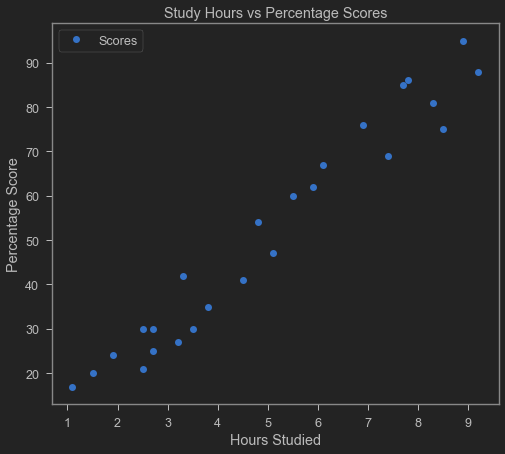

In [7]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

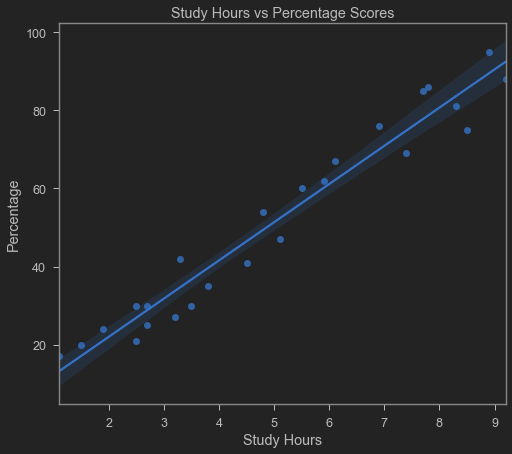

In [8]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=s_data['Hours'],y=s_data['Scores'],data=s_data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

*From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score*.

# 3. Performing Simple Linear Regression

*Importing required libraries for the modelling*

In [11]:
# Importing required libraries for the modelling
from sklearn.model_selection import train_test_split   # to split the dataframe
from sklearn.metrics import mean_squared_error          # metric for evaluation
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

*Preparing the data*

In [12]:
# Next is to define our "attributes"(input) variable and "labels"(output),Assigning X and Y values
X = s_data.iloc[:, :-1].values  #Attribute
y = s_data.iloc[:, 1].values    #Labels

*Now that we have the attributes and labels defined, the next step is to split this data into training and test sets*.

In [13]:
# Using Scikit-Learn's built-in train_test_split() method:  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

*Inferences
The above script splits 80% data to training set & 20% data to test set.The test_size variable is where we actually specify the proportion of the test set*

# 4. Training the Algorithm

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [15]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


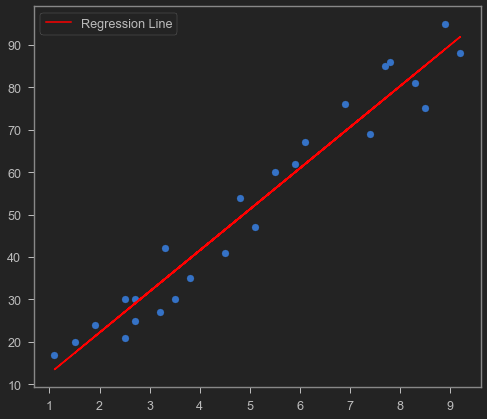

In [16]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

*As we can see that both the graph are identical and even the intercepts and coefficient of the line are same. So my effort of making linear regression algorithm from scratch has been a success!!

But as you can see, it is also pretty easy to use the built-in function. Few lines of code and your work is done.*

# 5. Making Predictions

*Now that we have trained our algorithm, it's time to make some predictions.*

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


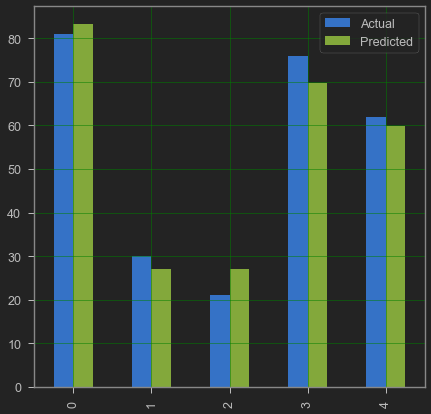

In [20]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

*Testing with some new data*

*What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?*

In [21]:
# Testing with our won data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


*According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.38 marks*.

# 6. Evaluating the model

*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset*.

In [22]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


*R-squared gives the goodness of the fit and as can be seen it is 96.7% which is really good. This means that the algorithm has proven to be good for the given data*.

*It can also be said that the model's accuracy is 96.78%*